<h1>WINE QUALITY ANALYSIS - NEURAL NETWORKS FOR REGRESSION</h1>

In [3]:
__author__ = "Miguel R. Ferreira Filho"
__email__ = "miguel.ribeiro@live.com"
__website__ = "miguelrferreiraf.github.io"

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>[Introduction](#scrollTo=LhAI2euwVtKK)

>[Importing libraries](#scrollTo=hD1P0m9D4z6X)

>[Data importation](#scrollTo=VuwvYSjFP3i-)

>[Extracting features and labels](#scrollTo=D-bpOvsaTBAV)

>[The constant of machine learning projects](#scrollTo=MCYioSEZmqzC)

>>[The scaling](#scrollTo=KvVWmKLm2c-2)

>[Data scaling](#scrollTo=ig4OQK5CTZ1j)

>[A nice visualization trick](#scrollTo=8fhY6GswUqea)

>[Standarlization](#scrollTo=8Mul_WuxbAZY)

>[Function for Metrics](#scrollTo=LdX5MyPnbcv-)

>[And here we go...](#scrollTo=gHSy0i8lhbse)

>>[Applying our def function](#scrollTo=E1WNb9yQ2bpp)

>>[12.1 Getting the number](#scrollTo=XG1reHdx3G1j)

>>[12.2. Analysing new data](#scrollTo=ATRnvBl13kVY)

>[Large models](#scrollTo=76jLf-HM5E55)

>>[13.1. Plotting the new model...](#scrollTo=aRaa5c446LTp)

>>[13.2. New model analysing same data](#scrollTo=F2HOmqYJ7dm0)

>[Big model](#scrollTo=-f-EeAVo8I-R)

>[What happened? Overfitting... Let's solve it.](#scrollTo=gOe_L4wX8wjf)

>[RMSProp optimization](#scrollTo=Ba9GGLSDrTo6)

>[Conclusion](#scrollTo=aLHTL6PapCOK)



# 1. Introduction

This project shows some basic concepts that involves the fundamentals of **unsupervised machine learning** with **neural networks** model.

The algorithm presents the basic paradigm of machine learning, wich is:

- data collection;
- data cleaning;
- model creation;
- running. 

There will be an output label as well: the quality of the wine, which is labeled as feature in the dataset and that must be predicted based on the other features processed by the neural network.

We are going to make a regression use of the neural network, which means the problem approached by our model takes the cleaned data and a input label for followingly predict the next label based on previous data.

That's the sort of work that can be made by using linear regression but here we are going to show that neural networks, generally used for abstract works as hand writing identification or chess playing, can be used for data analysis, differenty from what this is generally used for.

![Glass of wine](https://media.istockphoto.com/photos/red-wineglass-and-bottle-copy-space-picture-id1297401631?b=1&k=20&m=1297401631&s=170667a&w=0&h=6ZY_oidUVZWgmSwQ1k2Iuan7-MMy30p4JlDyzJFdMXQ=)

This project is made using:
- Python 3;
- Tensorflow 2;
- Scikit-learn;
- Keras. 

We must start, as usual in almost every machine learning project, by importing the libraries. Since our project is quite simple, there will not be many of them on use.

# 2. Importing libraries

In [6]:
import tensorflow as tf
import pandas as pd
import requests
import io
import matplotlib.pyplot as plt

# 3. Data importation

Although I often rather the csv format of archive in code, whose code line `pd.read_csv()` shows off an simple code solution, working with datasets from links holds a lot of perks, including the possibility of using wget commands in terminal, provides an ellegant solution for structured archived data. 

We are not going to use wget here but we are going to use an url with the link. This kind of precedure is my favorite, specially with shared working sets.  

As you can see, this url archive holds some vast amount of data showing some numerical values concerning the chemical composition of several wines, plus it`s critical avaliation.




In [7]:
url = 'https://raw.githubusercontent.com/Apress/artificial-neural-networks-with-tensorflow-2/main/Ch05/winequality-white.csv'
dataset = pd.read_csv(url , sep = ';')
dataset


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


# 4. Extracting features and labels

So here lays the theoretical basis of regression analysis. The point of the regression model is it`s capability of finding out a serie of optimals through the available data.

Let's extract from here the features and labels. We must extract the quality label.



In [8]:
x = dataset.drop('quality', axis = 1)
y = dataset['quality']

# 5. The constant of machine learning projects

All machine learning projects needs two things: the train dataset and the test dataset. Both are coming from the same dataset. 

Scikitlearn library already has the command to allow this spliting between train dataset and test dataset. The train_test_split command allows this with ease. We must now procede with new dataset creation. 

We reserve 15% of the data for testing. The trainig data is on 19:1 ratio, which means 95% of the training dataset is reserved for training and 5% for testing. 

In [9]:
# creating training, validation and testing datasets

from sklearn.model_selection import train_test_split
x_train_1 , x_test , y_train_1 , y_test = train_test_split(x , y , test_size = 0.15 , random_state = 0)
x_train , x_val , y_train , y_val = train_test_split(x_train_1 , y_train_1 ,test_size = 0.05 , random_state = 0)

## 6. The scaling

There's a lot of confusion about explaining the definition of scalonation. But this mathematical technology couldn't be simpler. Scaloning a data means we are taking the smaller value and turning it into a more workable number, as 0, and the greater number of the data and turning it into another more workable number, as 1. 

Scaloning isn't even an obligation: if we dont scalonize our current data, it will change roughly nothing on model concept. 

You can test it by yourself, by commenting with ''' ''' around the following code lines. You will see that is not gonna make any difference, although it may get a difference for the data setup.

In [10]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x_train_new = sc_x.fit_transform(x_train)

# 7. Data scaling

Now, let's check it out how scaling changes data setup by displaying the data firstly before scaling and then after: in red, we can see data before scaling. In green, after scaling. As you can see at y axis, it occured a change at the rates. 

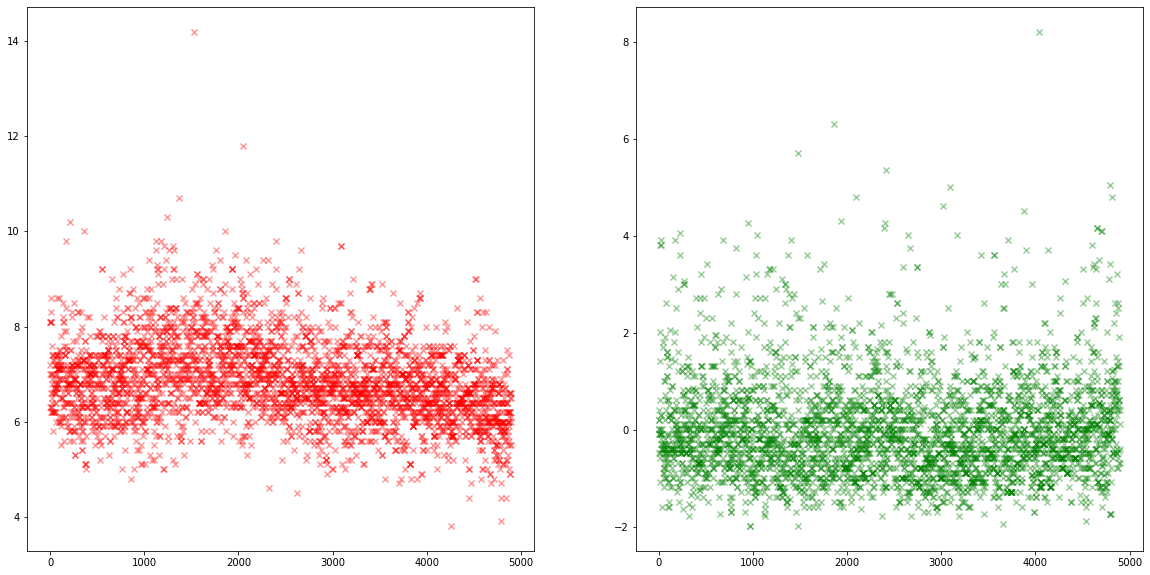

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 10))

ax1.scatter(x_train.index,
            x_train['fixed acidity'],
            color = 'red',
            label = 'raw',
            alpha = 0.4,
            marker = 'x')

ax2.scatter(x_train.index,
            x_train_new[: , 1],
            color = 'green',
            label = 'adjusted',
            alpha = 0.4,
            marker = 'x')

In [12]:
ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_xlabel('index')
  ax.set_ylabel('fixed acidity')
  ax.legend(loc ='upper right')
  ax.grid()

plt.tight_layout()

plt.show()

<Figure size 432x288 with 0 Axes>

# 8. A nice visualization trick

Let's try a instructive code movement. We may isolate a different feature from the dataset and show it up through the same technology. So we can see how distributed are the values through the dataset to deduce it's behaviour.

As you can see from the LHS plot, the residual sugar values vary between 0 and 30, while the total sulfur dioxide value has a large variation between 0 and 400. After the transformation, we can see in the RHS figure both fields has a mean value of approximatedly 0 and a distribution spreaded between nearby 2 and -2.

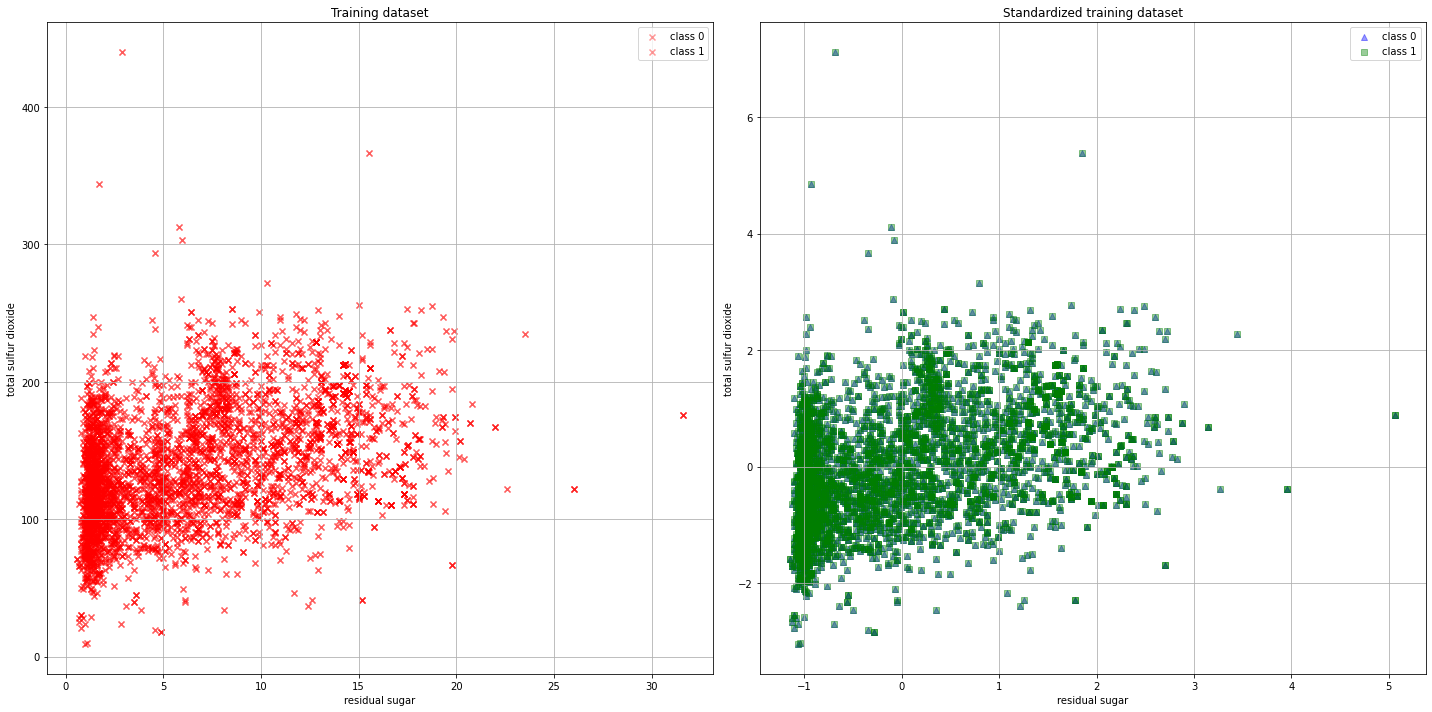

In [13]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (20, 10))

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's')):
  ax1.scatter(x_train['residual sugar'],
              x_train['total sulfur dioxide'],
              color = 'red',
              label = 'class %s' % l,
              alpha = 0.4,
              marker = 'x')
  
for l, c, m in zip(range(0, 2),('blue', 'green'), ('^', 's')):
  ax2.scatter(x_train_new[: , 3],
              x_train_new[: , 6],
              color = c,
              label = 'class %s' % l,
              alpha = 0.4,
              marker = m)
  
ax1.set_title('Training dataset')
ax2.set_title('Standardized training dataset')

for ax in (ax1, ax2):
  ax.set_xlabel('residual sugar')
  ax.set_ylabel('total sulfur dioxide')
  ax.legend(loc ='upper right')
  ax.grid()
plt.tight_layout()
plt.show()

# 9. Standarlization 

In the following line codes we can initiate the process of standarlization of all the training datasets in order to reduce the time of processing. It's a very simple line code:

In [14]:
x_test_new = sc_x.transform(x_test)
x_val_new = sc_x.transform(x_val)

# 10. Function for Metrics

Here we are gonna use MatplotLib to for the metric analysis and employ a new function to establish a efficiency metric for every model we will use.

Now, thats a very funny thing to code! We create a def function that will display the efficiency avaliation of each model we must employ. As  you can see, all the lines are quite self-explanatory. We are going to use the **MAE** (**mean absolute error**) as our standard evaluation method of learning curve. 

I'm not going to explain the difference of a MAE method and the RMSE (root mean squared error) right now. For now, let's establish that both are mathematical methods of learning progression evaluation for machine learning models. 

![Alt Text](https://media-exp1.licdn.com/dms/image/C5612AQF8JAeUs7CwCQ/article-inline_image-shrink_1000_1488/0/1543435697122?e=1663804800&v=beta&t=w3CyG0wmtqyEMxoJxc3no3NkvY3StWKORAfAhp71uCc)

![Alt Text](https://media-exp1.licdn.com/dms/image/C5612AQGFP9zW0t8N3g/article-inline_image-shrink_1000_1488/0/1543435785809?e=1663804800&v=beta&t=E85M5x3YBYpmHs9YovsFqlBfn55PmFlyjDcVogkJUc4)

As  you can see, there is no huge difference on the equations, the conceptual idea is quite the same (in fact, they're the absolutely same formula and concept!, with a really really subtle difference that may hide even from a sensible mathematician). Define which one is better require an better understanding of statistics (like when we're approaching the quadratic err rate or want to track outliers that may lead to err of the model - RMSE wins over MAE in this cases. In this cases, get to know the subtle difference between the two equations may be useful). But for now, we are not interested on it. 

We also must show up the epochs of the training. An epoch it's like how many times the model repeated the same trainig to get on the current eficciency. 

More epochs, more reliable the model. 

But also more time of processing is spent. We will createa  function to demonstrate of this data for each model in a very intuitive way. 



In [15]:
import matplotlib.pyplot as plt
epoch = 30

def plot_learningCurve(history):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  #plotting the mae vs epoch of training set
  plt.plot(epoch_range, history.history['mae'])
  #plotting the val_mae vs epoch of the validation dataset.
  plt.plot(epoch_range, history.history['val_mae'])
  plt.ylim([0, 2])
  plt.title('Model mae')
  plt.ylabel('mae')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()
  print("-------------------------------------------------------")

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.ylim([0, 4])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc = 'upper right')
  plt.show()


# 11. And here we go...

Let's create our first model. We're are going to create a standard neural network: scikit-learn keras sublibrary, Sequantial model, 16 neurons in hedden layer.  It's not big, but will be useful in order to make a demonstration.

Then again:  we are really really not into explaining the mathematical nature of a neural network. I have other models more sophisticated to do that. 

For now, you may have to know that neural networks has a visible layer which is the input data. Then it has hidden layers and an output layer which is the result: the conclusion of the model thinking. In our case, that will be number that evaluate the wine quality. Like this:

![alt text](https://drive.google.com/uc?id=1doez_X3Uw5IgJGG_qM1FHQeNzzt56oLW)

Let's focus on the simplicity that Keras provides for neural netwoks construction. Take a look above. There will be a **ReLU** activation function for each neuron. The again, comprehending what's a ReLU (**Rectified Linear Unit Function**, which is a cool way of saying it turns negative values to zero to vanish the gradient problem) involves some math, but we can resume like this: each neuron is a mathematical function. But there are different ways to provides a function wich describes a mathematical behaviour. Mathematically, a feedfoward neural net (like those that progressively receive features to enrich their inference capabilities) looks like this:

![alt text](https://drive.google.com/uc?id=18vlAgXDPIW0r3iHr-HtPmlnC7tgtOp0S)

Where for a variable X there may be different functions with different parameters (W and b for a linear function neuron) for it's neurons. That's how a single neuron looks like:

![alt text](https://drive.google.com/uc?id=1hgaTGG8TwX2KcwE__xecnMFWzjfwI3wl)

Where X is the variable, W and b the parameters and σ is our activation function. 

It may help you see how the parameter W receives each new data and fits inside each neuron layers. Take a look in this three layers neural net:

![alt text](https://drive.google.com/uc?id=1Qt4BvskQQEwgSnF8BYKcvWQ0DAW7lMFE)

Intuitive math, I love it!

Talking back about the activation function, quadratic function cannot be represented by a linear function. But sometimes, it needs to!, for processing economy. In this case, ReLU activation function works with linear functions wich provides a sufficient versatilty for the function values and gradient (displacement ratio) identification for each neuron. 

They're faster and *cheaper*, so to speak. Turns 

Since we can establish each neuron is a function, take a look on how how different types of activation functions deals with the same linear function. 

![alt text](https://drive.google.com/uc?id=1lPHeTGnLHPCGnsVYaE6WdpHa3UORf5_J)

So let's create and compile our model. We use the typical code line 'compile' and then use the model 'fit' command, as it's familiar to almost every machne learning student.

What comes next doesn't need a extensive explanation, is quite understandable only by reading the code: it`s a neural network with 11 input features, and 16 neurons. We will use and Adam optimizer and a MAE function for metrics. It's very intuitive.

In [16]:
small_model = tf.keras.Sequential([
                tf.keras.layers.Dense(16 ,
                activation = 'relu' ,
                input_shape = (11 , )),
                tf.keras.layers.Dense(1)])

small_model.compile(optimizer = 'adam' ,
                    loss = 'mse' ,
                    metrics = ['mae'])

history_small = small_model.fit(x_train_new, y_train ,
                batch_size = 32,
                epochs = 30,verbose = 1 ,
                validation_data =
                (x_val_new , y_val))

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 30.6221 - mae: 5.3851 - val_loss: 23.5985 - val_mae: 4.7190
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 16.8105 - mae: 3.8678 - val_loss: 12.1927 - val_mae: 3.2308
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 7.9240 - mae: 2.4709 - val_loss: 5.5708 - val_mae: 1.9994
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 3.8808 - mae: 1.6062 - val_loss: 3.1102 - val_mae: 1.4456
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 2.6576 - mae: 1.2911 - val_loss: 2.3722 - val_mae: 1.2684
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 2.2563 - mae: 1.1806 - val_loss: 2.0648 - val_mae: 1.1816
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 2.0305 - mae: 1.1127 - val_loss: 1.8496 - val_mae: 1.1142
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss

## 12. Applying our def function

Now, we use the def function we created before to visualize the evaluation metrics. 

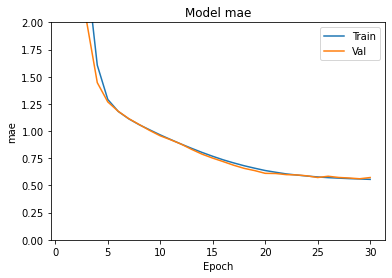

-------------------------------------------------------


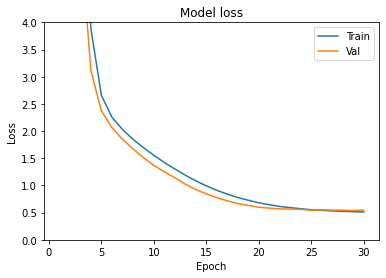

In [17]:
plot_learningCurve(history_small)

## 12.1 Getting the number

For getting the exact number of the model loss, we may use the following line code:

In [18]:
s_test_loss , s_test_mae = small_model.evaluate(x_test_new , y_test ,
                                              batch_size = 32 , verbose = 1)

print("small model test_loss : {}".format(s_test_loss))
print("small model test_mae : {} ".format(s_test_mae))

23/23 [==============================] - 0s 1ms/step - loss: 0.6189 - mae: 0.6119
small model test_loss : 0.6188533306121826
small model test_mae : 0.6119031310081482 


## 12.2. Analysing new data

That`s the time to evaluate how our model perform on working with new raw data. If we take the test data and depart some single random label. Then we may create there a new data using a simple declaration of array like above. Now, we run our model so it will evaluate the quality of our new wine:

PS: That's so funny!

In [21]:
import numpy as np

unseen_data = np.array([[6.0 , 0.28 , 0.22 , 12.15 ,
                      0.048 , 42.0 , 163.0 ,
                      0.99570 , 3.20 , 0.46 ,
                      10.1]])

y_small = small_model.predict(sc_x.transform(unseen_data))
print("\n\n\n")

print("Wine quality on unseen data(small model):", y_small[0][0])

print("\n\n\n")





Wine quality on unseen data(small model): 5.7050853






/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# 13. Large models

Now, we will add two new layers to our neural network and multiply the number of neurons to 128.

As you can see above, the new layers and neurons add no more complex systems of code lines. It is exactly the same algorithmic paradigm that Keras provides. It means we can increase our model quality only by adding some lines more at the same code. 

After this, we compile and fit the model as usual.

In [22]:
medium_model = tf.keras.Sequential([
                  tf.keras.layers.Dense
                  (64 , activation = 'relu' ,
                  input_shape = (11, )),
                  tf.keras.layers.Dense
                  (64 , activation = 'relu'),
                  tf.keras.layers.Dense
                  (64 , activation = 'relu'),
                  tf.keras.layers.Dense(1)
                  ])

medium_model.compile(loss = 'mse' ,
                    optimizer = 'adam' ,
                    metrics = ['mae'])

history_medium = medium_model.fit(x_train_new , y_train ,
                batch_size = 32,
                epochs = 30, verbose = 1 ,
                validation_data =
                (x_val_new , y_val))

Epoch 1/30
124/124 [==============================] - 1s 3ms/step - loss: 9.3878 - mae: 2.3419 - val_loss: 2.0446 - val_mae: 1.1579
Epoch 2/30
124/124 [==============================] - 0s 2ms/step - loss: 1.9209 - mae: 1.0532 - val_loss: 1.2811 - val_mae: 0.9208
Epoch 3/30
124/124 [==============================] - 0s 2ms/step - loss: 1.2317 - mae: 0.8457 - val_loss: 0.8796 - val_mae: 0.7576
Epoch 4/30
124/124 [==============================] - 0s 2ms/step - loss: 0.8103 - mae: 0.6925 - val_loss: 0.5949 - val_mae: 0.6142
Epoch 5/30
124/124 [==============================] - 0s 2ms/step - loss: 0.6246 - mae: 0.6101 - val_loss: 0.5374 - val_mae: 0.5638
Epoch 6/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5476 - mae: 0.5693 - val_loss: 0.5847 - val_mae: 0.5876
Epoch 7/30
124/124 [==============================] - 0s 2ms/step - loss: 0.5190 - mae: 0.5597 - val_loss: 0.5980 - val_mae: 0.5999
Epoch 8/30
124/124 [==============================] - 0s 2ms/step - loss: 0.

## 13.1. Plotting the new model...

Let`s see how our new robust model worked on using the same deF function.

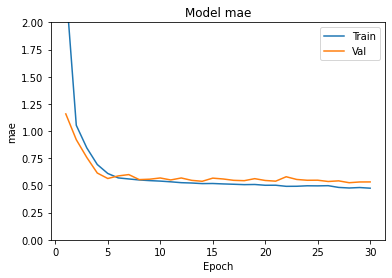

-------------------------------------------------------


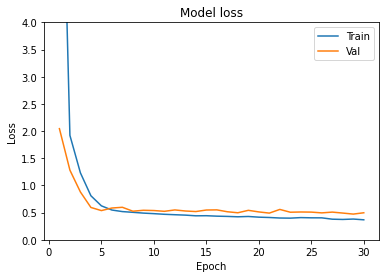

In [23]:
plot_learningCurve(history_medium)

## 13.2. New model analysing same data

Let's see now how our new larger model procedes to analysis he same unseen data array we created. Remember that we create new data of a hypothetical wine and excluded the quality label. Let's see if our more robust model predicts wine quality more precisely then the previous: 

In [24]:
m_test_loss , m_test_mae = medium_model.evaluate(x_test_new , y_test ,
                            batch_size = 32 , verbose = 1 )

print("\n\n\n")

print("medium model test_loss : {}".format(m_test_loss))
print("medium model test_mae : {}".format(m_test_mae))

y_medium = medium_model.predict(sc_x.transform(unseen_data))

print("\n")
print("Wine quality on unseen data(medium model): ", y_medium[0][0])

print("\n\n\n")


23/23 [==============================] - 0s 1ms/step - loss: 0.5369 - mae: 0.5644




medium model test_loss : 0.5369279980659485
medium model test_mae : 0.5644304156303406


Wine quality on unseen data(medium model):  5.184259






/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


Yes, it does! The result is nearer to the real one than the previous smaller model.

# 14. Big model

Now, we are going create an even larger model and test it with the very same data from previous tests.


In [25]:
large_model = tf.keras.Sequential([tf.keras.layers.Dense
              (128 , activation = 'relu' ,
              input_shape = (11, )),
              tf.keras.layers.Dense
              (128 , activation = 'relu'),
              tf.keras.layers.Dense
              (128 , activation = 'relu'),
              tf.keras.layers.Dense
              (128 , activation = 'relu'),
              tf.keras.layers.Dense(1)])

large_model.compile(loss = 'mse' , optimizer = 'adam' ,
                    metrics = ['mae'])

history_large = large_model.fit(x_train_new , y_train ,
                                batch_size = 32, epochs = 30,
                                verbose = 1 , validation_data =
                                (x_val_new , y_val))

Epoch 1/30
124/124 [==============================] - 1s 4ms/step - loss: 4.3819 - mae: 1.5092 - val_loss: 1.4589 - val_mae: 1.0002
Epoch 2/30
124/124 [==============================] - 0s 3ms/step - loss: 0.9909 - mae: 0.7654 - val_loss: 0.5576 - val_mae: 0.5893
Epoch 3/30
124/124 [==============================] - 0s 3ms/step - loss: 0.6075 - mae: 0.6062 - val_loss: 0.5641 - val_mae: 0.5629
Epoch 4/30
124/124 [==============================] - 0s 3ms/step - loss: 0.5310 - mae: 0.5692 - val_loss: 0.5849 - val_mae: 0.5801
Epoch 5/30
124/124 [==============================] - 0s 3ms/step - loss: 0.5017 - mae: 0.5496 - val_loss: 0.5508 - val_mae: 0.5757
Epoch 6/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4727 - mae: 0.5360 - val_loss: 0.5233 - val_mae: 0.5587
Epoch 7/30
124/124 [==============================] - 0s 3ms/step - loss: 0.4536 - mae: 0.5235 - val_loss: 0.5422 - val_mae: 0.5763
Epoch 8/30
124/124 [==============================] - 0s 3ms/step - loss: 0.

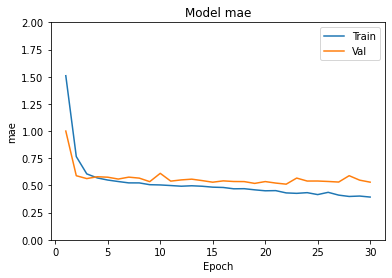

-------------------------------------------------------


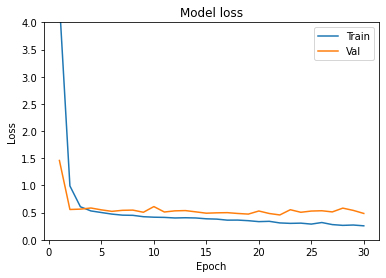

In [26]:
plot_learningCurve(history_large)

In [27]:
l_test_loss , l_test_mae = large_model.evaluate(x_test_new , y_test ,
                                                batch_size = 32 , verbose = 1)

print("\n\n")

print("large model test_loss : {}".format(l_test_loss))
print("large model test_mae : {}".format(l_test_mae))

23/23 [==============================] - 0s 2ms/step - loss: 0.5589 - mae: 0.5656



large model test_loss : 0.5588791370391846
large model test_mae : 0.5656048655509949


# 15. What happened? **Overfitting**... Let's solve it.

It's a very common misreading to think that as analyists, we are chained to diagnosis from number alone. If it was like this, we shouldn't be using visual representation as graphics.

Visual diagnosis is important too! Not always the numbers alone provides the ultimate information for humans. By looking the graph from the previous cell, we may deduce some important things, like the saturation before three epochs of training. 

Overfitting occurs when a model works better in training than when analysing new data. 

It's like as the model knows the parameters of data patterns but is's capable to realize all it's inference. 

To solve this problem, firstly we may add new dropout layers. Compare the following code lines to the previous similar lines. It's a simple question of size of the neural net hidden dense layers.

In [28]:
y_large = large_model.predict(sc_x.transform
          (np.array([[6.0 , 0.28 , 0.22 , 12.15 ,
                    0.048 , 42.0 , 163.0 ,
                    0.99570 , 3.20 , 0.46 ,
                    10.1]])))

print("Wine quality on unseen data (large model): ",y_large[0][0])
print("\n\n")

Wine quality on unseen data (large model):  5.2645106





/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


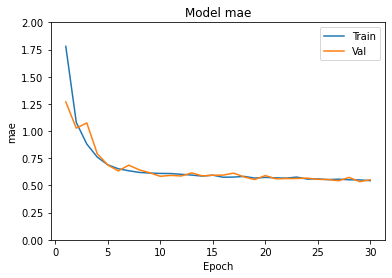

-------------------------------------------------------


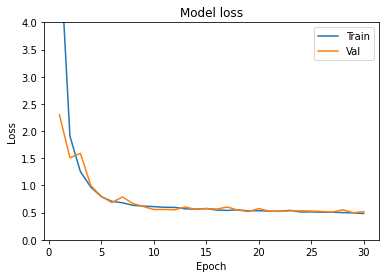

In [29]:
large_model_overfit = tf.keras.Sequential([
                      tf.keras.layers.Dense
                      (128 , activation = 'relu' ,
                      input_shape = (11, )),
                      tf.keras.layers.Dropout(0.4),
                      tf.keras.layers.Dense
                      (128 , activation = 'relu'),
                      tf.keras.layers.Dropout(0.3),
                      tf.keras.layers.Dense
                      (128 , activation = 'relu'),
                      tf.keras.layers.Dropout(0.2),
                      tf.keras.layers.Dense
                      (128 , activation = 'relu'),
                      tf.keras.layers.Dense(1)
                      ])

large_model_overfit.compile(loss = 'mse' ,
                            optimizer = 'adam' , metrics = ['mae'])

history_large_overfit = large_model_overfit.fit(x_train_new , y_train , batch_size = 32,
                                                epochs = 30,verbose = 0 , 
                                                validation_data = (x_val_new , y_val))

plot_learningCurve(history_large_overfit)

# 16. RMSProp optimization

RMSProp is a optimazation function with similar use to Adam. We are going to use it to reduce the overfitting. Let's use it on our small model we already created, replacing the adam function to RMSProp 

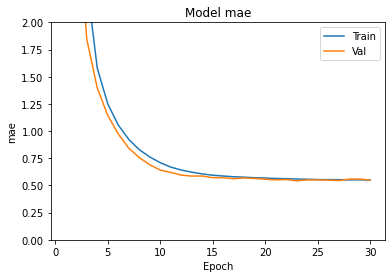

-------------------------------------------------------


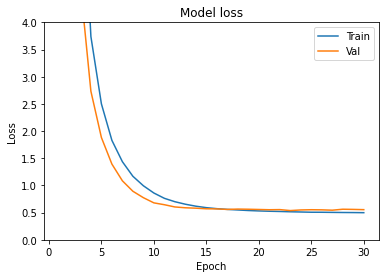

In [30]:
model_small = tf.keras.Sequential([
              tf.keras.layers.Dense(16 ,
              activation = 'relu' ,
              input_shape = (11 , )),
              tf.keras.layers.Dense(1)
              ])

optimizer = tf.keras.optimizers.RMSprop(0.001)
model_small.compile(loss = 'mse' , optimizer = optimizer ,
                    metrics = ['mae'])

history_small_overfit = model_small.fit(x_train_new , y_train ,
                                        batch_size = 32,
                                        epochs = 30, 
                                        verbose = 0 ,
                                        validation_data = (x_val_new , y_val))

plot_learningCurve(history_small_overfit)

# 17. Conclusion

That's was pretty funny!

This is it!, have a nice day, folks!

![Alt Text](https://i.pinimg.com/originals/0f/ab/3e/0fab3e4f7e9e7d3f199c49f10308ac05.gif)

By: Miguel Ferreira

 

In [37]:
! jupyter nbconvert --to html Wine_Quality_Neural_Networks_works_Regression.ipynb


[NbConvertApp] Converting notebook Wine_Quality_Neural_Networks_works_Regression.ipynb to html
[NbConvertApp] Writing 1071998 bytes to Wine_Quality_Neural_Networks_works_Regression.html
